In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [7]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [9]:
kmeans = KMeans(n_clusters = 5, random_state=42)

df['kmeans_group'] = kmeans.fit_predict(X_scaled)

In [15]:

from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps=0.4, min_samples=5)
df['DBSCAN_Group'] = dbscan.fit_predict(X_scaled)


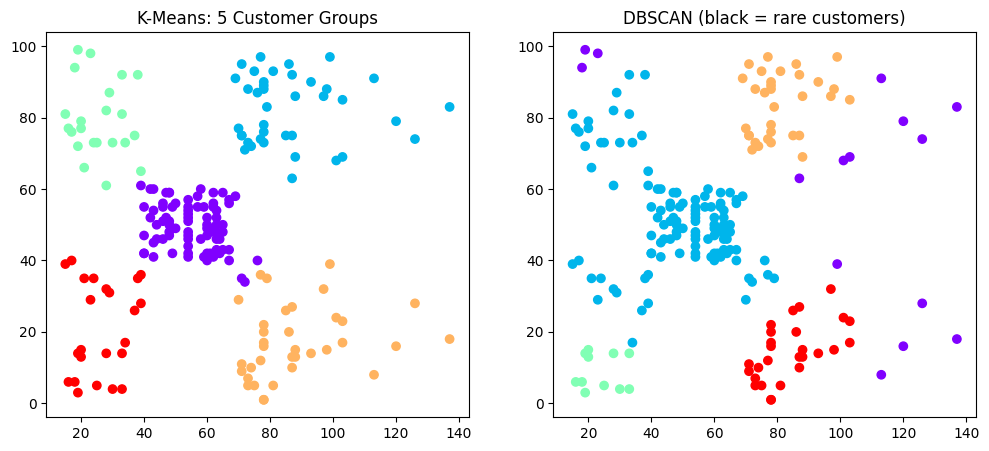

In [16]:

# Beautiful plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['kmeans_group'], cmap='rainbow')
plt.title('K-Means: 5 Customer Groups')

plt.subplot(1,2,2)
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['DBSCAN_Group'], cmap='rainbow')
plt.title('DBSCAN (black = rare customers)')
plt.show()

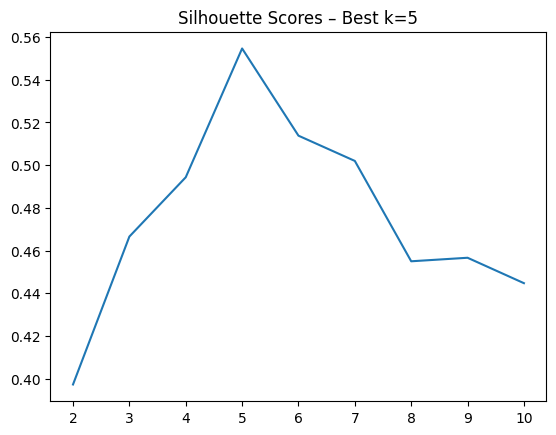

In [17]:
# 1 K-Means + Silhouette (30 min)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2024%20-%20K-Means%20Clustering/Mall_Customers.csv"
df = pd.read_csv(url)
X = df.iloc[:, [3, 4]].values  # Annual Income + Spending Score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2,11), sil_scores)
plt.title("Silhouette Scores – Best k=5")
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

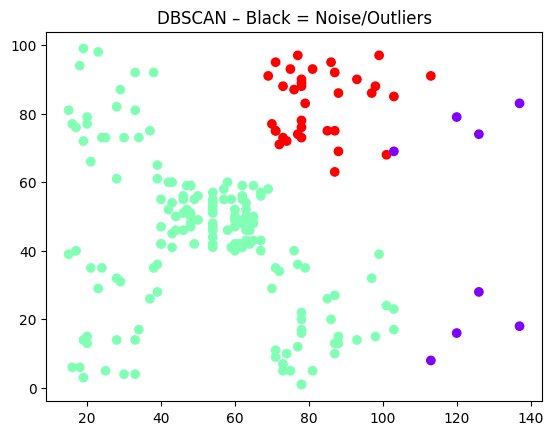

In [18]:
# 2 DBSCAN (30 min)
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN'] = db.fit_predict(X_scaled)

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['DBSCAN'], cmap='rainbow')
plt.title("DBSCAN – Black = Noise/Outliers")
plt.show()

In [ ]:
# 3 Hierarchical (45 min)
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram – Cut at 5 clusters")
plt.show()

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical'] = hc.fit_predict(X_scaled)

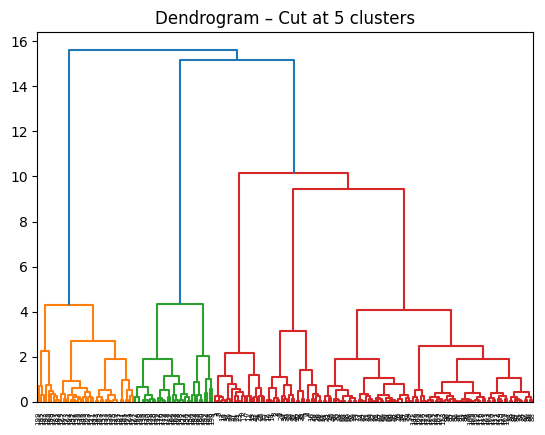

In [23]:
import scipy.cluster.hierarchy as sch

dend=sch.dendrogram(sch.linkage(X_scaled, method = 'ward'))
plt.title("Dendrogram – Cut at 5 clusters")
plt.show()

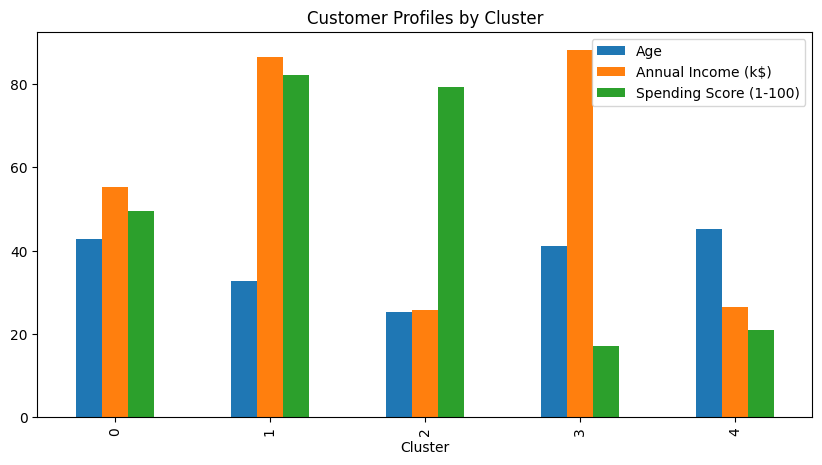

In [26]:

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical'] = hc.fit_predict(X_scaled)

# 4 Customer Insights (3 hours – the fun part)
group_stats = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
group_stats.plot(kind='bar', figsize=(10,5))
plt.title("Customer Profiles by Cluster")
plt.show()

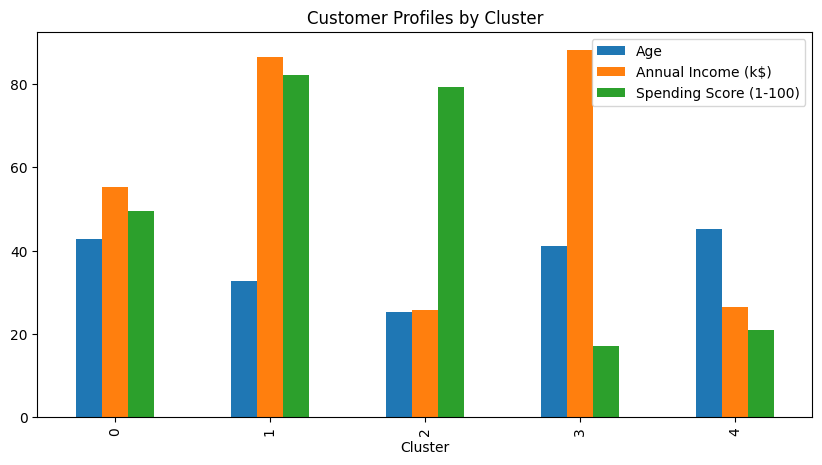